## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve

## Read in the data 

#### Data set

In [2]:
df = pd.read_csv('wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

In [3]:
print("The data size is\n")
df.shape

The data size is



(178, 14)

In [4]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [5]:
a = df['Alcohol'].describe()
b = df['Malic acid'].describe()
c = df['Ash'].describe()
d = df['Alcalinity of ash'].describe()
e = df['Magnesium'].describe()
f = df['Total phenols'].describe()
g = df['Flavanoids'].describe()
h = df['Nonflavanoid phenols'].describe()
i = df['Proanthocyanins'].describe()
j = df['Color intensity'].describe()
k = df['Hue'].describe()
l = df['OD280/OD315 of diluted wines'].describe()
m = df['Proline'].describe()
dfs = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l, m], axis = 1)
print("The basic statistics of the features are\n")
dfs

The basic statistics of the features are



,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

Yes, the boxplots of alcohol and flavanoids features showing this two features classify wine.


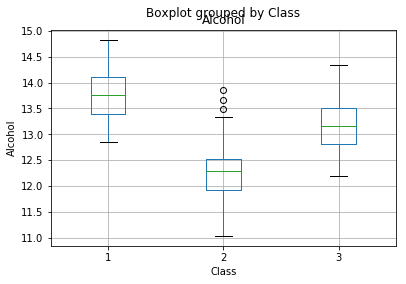

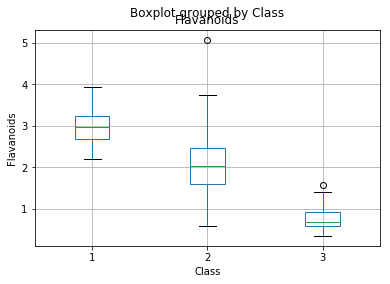

In [6]:
df.boxplot('Alcohol', by = 'Class')
plt.ylabel("Alcohol")

df.boxplot('Flavanoids', by = 'Class')
plt.ylabel("Flavanoids")
print("Yes, the boxplots of alcohol and flavanoids features showing this two features classify wine.")

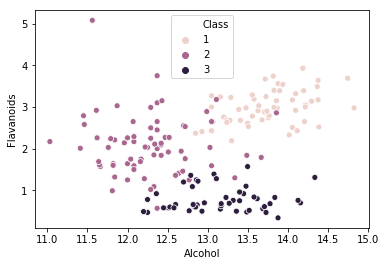

In [7]:
sns.scatterplot(x="Alcohol", y="Flavanoids", hue = "Class", legend = "full", data = df)

####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not be applicable here.


In [8]:
# Define x and y 
x = df.drop('Class', 1)
y = df['Class']
print (x.shape)
print (y.shape)

(178, 13)
(178,)


In [9]:
# Split into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(89, 13)
(89,)
(89, 13)
(89,)


In [10]:
# Import and instantiate the model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
y_pred_class = clf.predict(x_test)
print(y_pred_class.shape)

(89,)


In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9775280898876404

In [13]:
# Print the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
cmdf = pd.DataFrame(cm,index=['1', '2', '3'], columns=['1','2','3'])
print("The confusion matrix for three wine classes looks like following...\n")
cmdf

The confusion matrix for three wine classes looks like following...



,1,2,3
1,33,0,0
2,1,32,1
3,0,0,22


After create and test the model, the accuracy of the model is about 0.977 which is really high accuracy. So the model is working effectively for wine classification. One of reason that we are getting high accuracy is probably because the data size is relatively small. The confusion matrix above shows the three wine types and the predicted values. Original code and data are posted on github.(https://github.com/joyleeisu/ABE516X-Naive-Bayes.git)